# Asset Analysis

## Libraries Importing

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Data Importing

In [2]:
# data importing
df = pd.read_csv('asset_phrakhanong.csv')

# get district and subdistrict from address
df['district'] = df['address'].apply(lambda x: x.split(', ')[-1])
df['subdistrict'] = df['address'].apply(lambda x: x.split(', ')[-2])
df['price'] = (df['price'] / 1e6).round(2)

df.head()

,id,price,name,address,built_year,distance_to_phrakhanong[m],floor_area[sqm],property_type,bedroom,bath,url,district,subdistrict
0,10964624,7.40,The Lofts Ekkamai,"1415 Sukhumvit Road, Phra Kanong Nua, Watthana",2017.0,530,45,Condo,1,1,https://www.ddproperty.com/en/property/the-lof...,Watthana,Phra Kanong Nua
1,11079260,2.80,เดอะ วอเตอร์ฟอร์ด,"Phra Kanong, Khlong Toei",NaN,770,64,Condo,0,0,https://www.ddproperty.com/en/property/เดอะ-วอ...,Khlong Toei,Phra Kanong
2,11023879,29.50,House Sukhumvit 69 BTS Phakanong,"Sukhumvit 69, Phra Kanong Nua, Watthana",NaN,130,395,Detached House,3,5,https://www.ddproperty.com/en/property/house-s...,Watthana,Phra Kanong Nua
3,11050629,5.50,Sky Walk Residences,"1599 Sukhumvit Road, Phra Kanong Nua, Watthana",2012.0,270,54,Condo,1,1,https://www.ddproperty.com/en/property/sky-wal...,Watthana,Phra Kanong Nua
4,11029139,2.53,The Base Park West Sukhumvit 77,"11 Soi Sukhumvit 77 Sukhumvit Road, Phra Kanon...",2015.0,990,26,Condo,1,1,https://www.ddproperty.com/en/property/the-bas...,Watthana,Phra Kanong Nua


## District and Sub-District Distribution

In [3]:
# show value counts of (sub)district
display(df.district.value_counts())
display(df.subdistrict.value_counts())

district
Khlong Toei     965
Watthana        844
Phra Khanong      5
Nonthaburi        1
Name: count, dtype: int64

subdistrict
Phra Kanong        928
Phra Kanong Nua    681
Khlong Tan Nua     112
Sukhumvit Road      36
Khlong Toei         19
Khong Tan           18
Khlongtoei Nua      15
Bang Chak            5
Pak Kret             1
Name: count, dtype: int64

In [4]:
# create column saleprice that takes log of price 

# display mean saleprice of each property_type
grouped_property_type = df.groupby('property_type')[['price']].mean()
grouped_property_type.sort_values(by='price', ascending=True)

,price
property_type,
Condo,7.862977
Townhouse,23.279722
Detached House,73.094264
Apartment,147.262500
Land,167.937231


In [5]:
# filter only condo and drop row without built year
condo = df[(df.property_type=='Condo') & (df['built_year'].notna())].copy()

# create feature "age"
condo['age'] = 2023 - condo['built_year']

# condo names are duplicated, so append index before name
condo['name'] = condo.index.astype(str) + ' - ' + condo['name']

# drop unused columns
condo.drop(columns=['id', 'url'], inplace=True)
condo.drop_duplicates(inplace=True)

condo.head()

,price,name,address,built_year,distance_to_phrakhanong[m],floor_area[sqm],property_type,bedroom,bath,district,subdistrict,age
0,7.40,0 - The Lofts Ekkamai,"1415 Sukhumvit Road, Phra Kanong Nua, Watthana",2017.0,530,45,Condo,1,1,Watthana,Phra Kanong Nua,6.0
3,5.50,3 - Sky Walk Residences,"1599 Sukhumvit Road, Phra Kanong Nua, Watthana",2012.0,270,54,Condo,1,1,Watthana,Phra Kanong Nua,11.0
4,2.53,4 - The Base Park West Sukhumvit 77,"11 Soi Sukhumvit 77 Sukhumvit Road, Phra Kanon...",2015.0,990,26,Condo,1,1,Watthana,Phra Kanong Nua,8.0
9,4.00,9 - Aspire Rama 4,"Rama 4 Road, Phra Kanong, Khlong Toei",2011.0,800,47,Condo,2,1,Khlong Toei,Phra Kanong,12.0
10,3.40,10 - Life Sukhumvit 48,"Soi Sukhumvit 48, Phra Kanong, Khlong Toei",2018.0,550,30,Condo,1,1,Khlong Toei,Phra Kanong,5.0


## Correlation Analysis

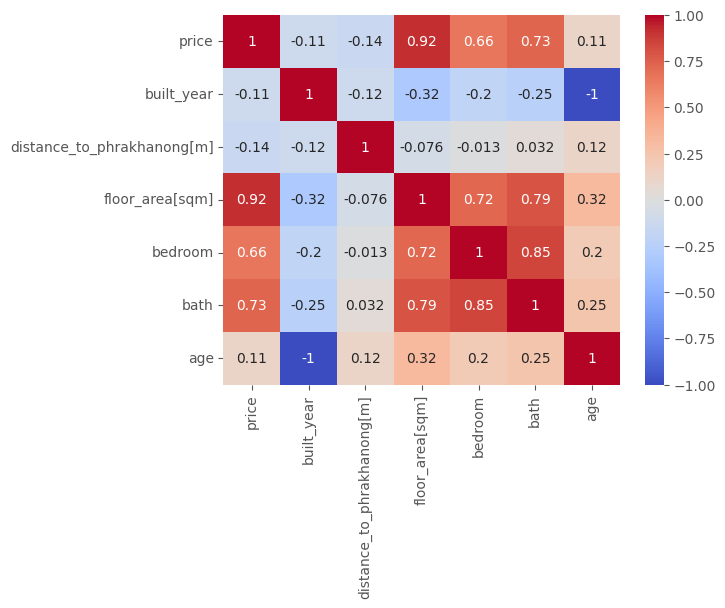

In [6]:
# correlation heatmap
sns.heatmap(condo.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='coolwarm');

## Feature Selection and Data Scaling

In [7]:
# features selection
num_features = ['distance_to_phrakhanong[m]', 'floor_area[sqm]', 'bedroom', 'bath', 'age']
cat_features = ['subdistrict']

# X and y assigning
X = condo[num_features+cat_features]
X = pd.get_dummies(X, columns=cat_features, drop_first=True, dtype=int)

y = condo['price']

# data scaling
sc = StandardScaler()
X = sc.fit_transform(X)

print(X.shape, y.shape)

(1270, 9) (1270,)


## Modeling: Linear Regression

0.8922981652352043


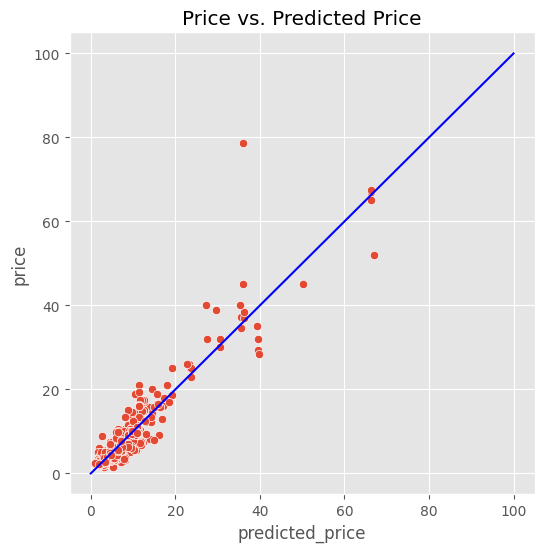

In [8]:
# Initiating Linear Regression
lr = LinearRegression()
lr.fit(X, y)
print(lr.score(X, y))

# prediction
pred = lr.predict(X)
condo['predicted_price'] = pred.round(2)

# diff column = predicted_price - price
condo['diff'] = (condo['predicted_price'] - condo['price']).round() ## diff > 0 is worth investing

# Plots of predicted price vs. price
plt.figure(figsize=(6,6))
sns.scatterplot(x='predicted_price', y='price', data=condo)
plt.title('Price vs. Predicted Price')
plt.plot((0, 100), (0, 100), color='blue');

## Top 20 condos with highest price appreciation

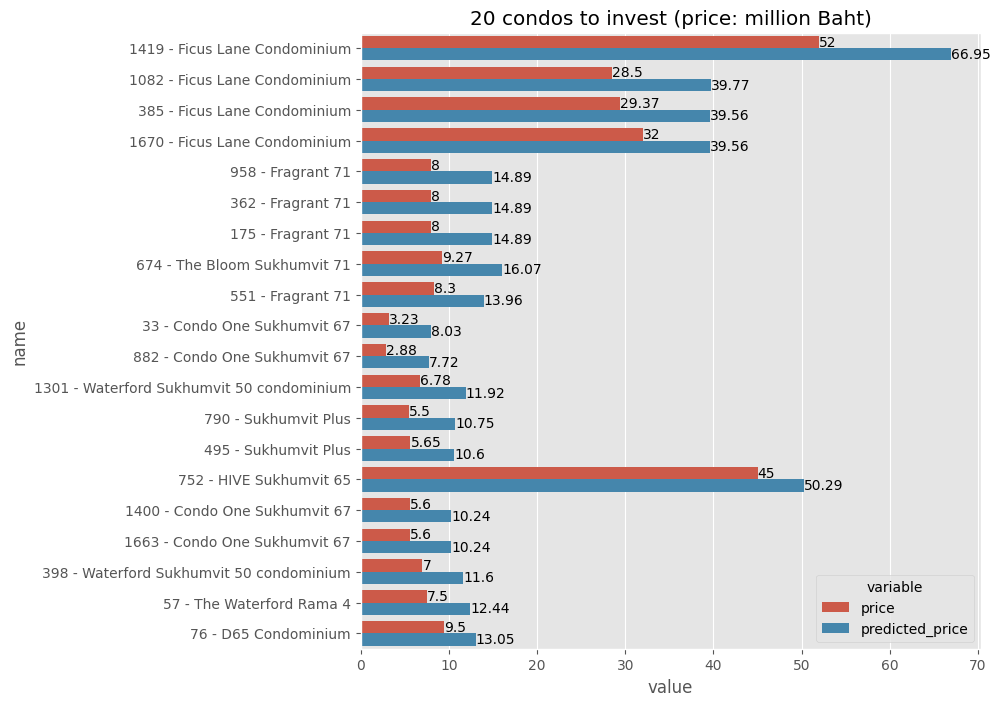

In [9]:
# Sort top20 condos with highest differences between predicted price and price
top20 = condo[condo['diff'] > 0].sort_values('diff', ascending=False).head(20)
top20_melt = top20.melt(id_vars=['name'], value_vars=['price', 'predicted_price'])

plt.figure(figsize=(8,8))
ax = sns.barplot(x='value', y='name', hue='variable', data=top20_melt, errorbar=('ci', False))
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('20 condos to invest (price: million Baht)');

## Top 20 condos with highest price appreciation within 200 meters from Phrakanong BTS station

/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_65178/2133007094.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='value', y='name', hue='variable', data=top20_within_200_melt, ci=None)
/Users/atikarnpattamavichaiporn/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/atikarnpattamavichaiporn/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/atikarnpattamavichaiporn/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/atikarnpattamavichaiporn/Library/Pyth

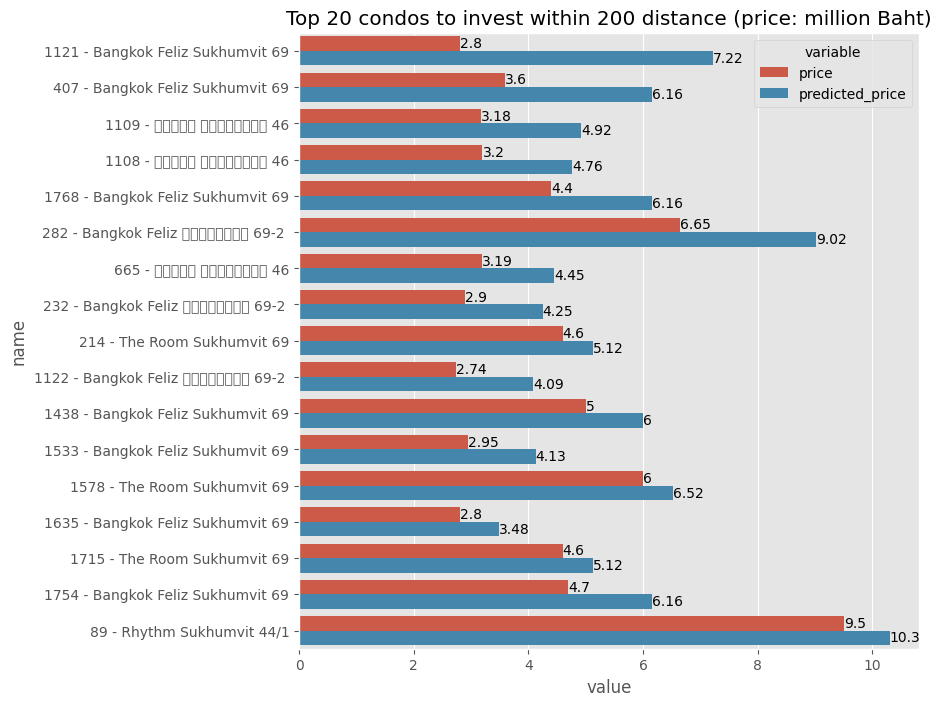

In [10]:
# Filter condos where distance is less than or equal to 200
condos_within_200_distance = condo[condo['distance_to_phrakhanong[m]'] <= 200]

# Select top 20 condos meeting the condition 'diff > 0' within 200 distance
top20_within_200 = condos_within_200_distance[condos_within_200_distance['diff'] > 0].sort_values('diff', ascending=False).head(20)

# Melt the top 20 condos within 200 distance
top20_within_200_melt = top20_within_200.melt(id_vars=['name'], value_vars=['price', 'predicted_price'])

# Visualize the filtered top 20 condos within 200 distance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))
ax = sns.barplot(x='value', y='name', hue='variable', data=top20_within_200_melt, ci=None)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Top 20 condos to invest within 200 distance (price: million Baht)')
plt.show()


/var/folders/0n/kzwpck_52r3g7z87p_fp5jlw0000gn/T/ipykernel_65178/3188091844.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='diff', y='name', data=top20_highest_diff_within_200, ci=None, color='blue')
/Users/atikarnpattamavichaiporn/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/atikarnpattamavichaiporn/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3636 (\N{THAI CHARACTER SARA I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/atikarnpattamavichaiporn/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/atikarnpattamavichaiporn/Library/Pyth

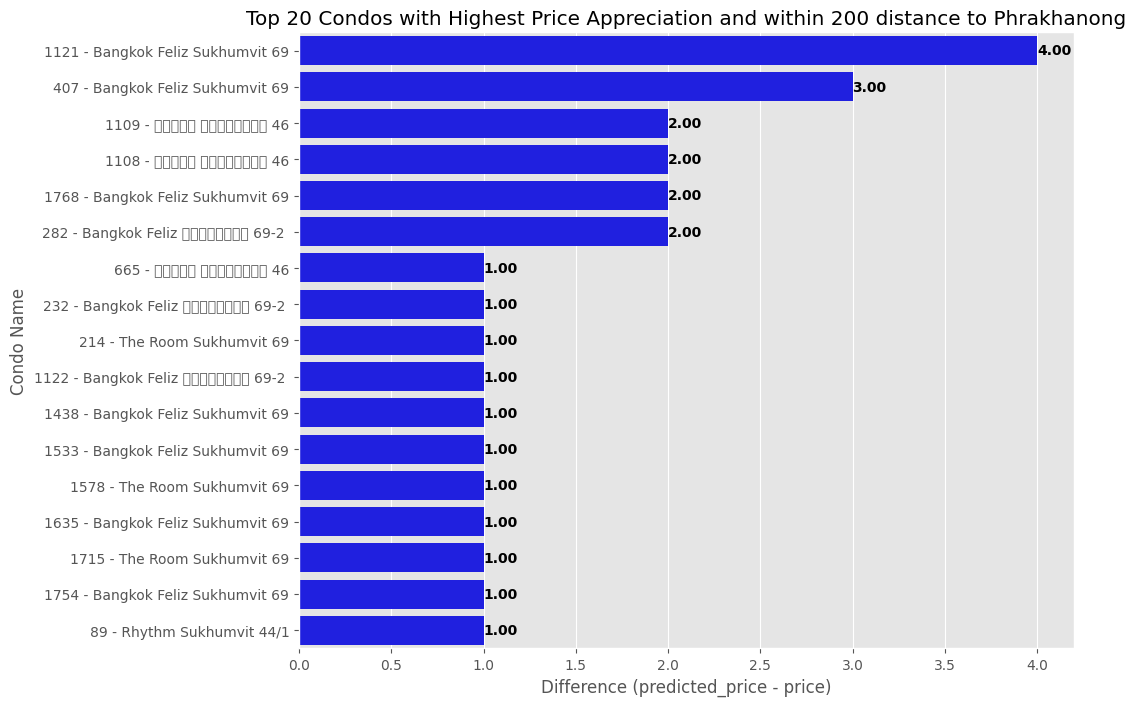

In [11]:
# filter condos where distance is less than or equal to 200
condos_within_200_distance = condo[condo['distance_to_phrakhanong[m]'] <= 200]

# select top 20 condos meeting the condition 'diff > 0' within 200 distance
top20_highest_diff_within_200 = condos_within_200_distance[condos_within_200_distance['diff'] > 0].nlargest(20, 'diff')

# plot condos againt price difference

plt.figure(figsize=(10, 8))
sns.barplot(x='diff', y='name', data=top20_highest_diff_within_200, ci=None, color='blue')

# adding labels to the bars
for index, value in enumerate(top20_highest_diff_within_200['diff']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', color='black', fontweight='bold')

plt.xlabel('Difference (predicted_price - price)')
plt.ylabel('Condo Name')
plt.title('Top 20 Condos with Highest Price Appreciation and within 200 distance to Phrakhanong')
plt.show()
